In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import TensorBoard

C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97905\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
##VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))
conv_base.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
#Initialize the CNN
classifier = Sequential()

classifier.add(conv_base)

##POOLING
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))


In [4]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 15,239,489
Trainable params: 524,801
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'dataset/Train',
    target_size=(128, 128),
    batch_size=30,
    class_mode='binary',
    subset='training') # set as training data

Found 224 images belonging to 2 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    'dataset/Train', # same directory as training data
    target_size=(128, 128),
    batch_size=30,
    class_mode='binary',
    subset='validation') # set as validation data


Found 56 images belonging to 2 classes.


In [10]:
hist = classifier.fit_generator(
      train_generator,
      steps_per_epoch=90,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=32,callbacks=[TensorBoard(log_dir='logs/3')])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
8/8 [==============================] - 33s 4s/step - loss: 0.4572 - acc: 0.7589 - val_loss: 0.2257 - val_acc: 0.9107
Epoch 2/15
8/8 [==============================] - 31s 4s/step - loss: 0.2340 - acc: 0.9018 - val_loss: 0.1634 - val_acc: 0.9286
Epoch 3/15
8/8 [==============================] - 32s 4s/step - loss: 0.2208 - acc: 0.8929 - val_loss: 0.1900 - val_acc: 0.9286
Epoch 4/15
8/8 [==============================] - 31s 4s/step - loss: 0.1971 - acc: 0.9152 - val_loss: 0.1775 - val_acc: 0.9464
Epoch 5/15
8/8 [==============================] - 37s 5s/step - loss: 0.1638 - acc: 0.9196 - val_loss: 0.2703 - val_acc: 0.8750
Epoch 6/15
8/8 [==============================] - 45s 6s/step - loss: 0.1271 - acc: 0.9464 - val_loss: 0.1073 - val_acc: 0.9643
Epoch 7/15
8/8 [==============================] - 47s 6s/step - loss: 0.1103 - acc: 0.9464 - val_loss: 0.0881 - val_acc: 0.9643
Epoch 8/15
8/8 [==============================] - 49s 6s

### Evaluate Model

### Plot Learning Rate

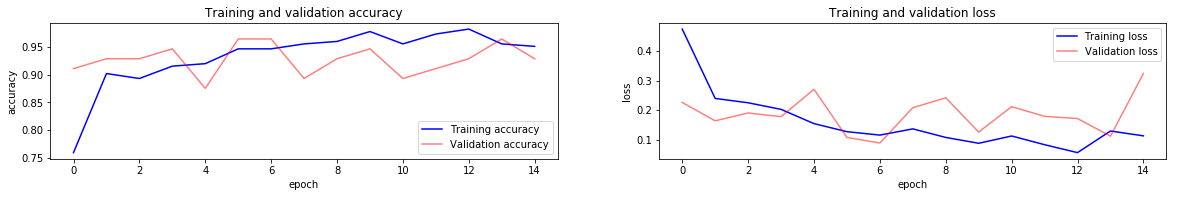

In [11]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))

plt.figure(figsize=(20,2.5))

plt.subplot(121) 
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', alpha = 0.5,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', alpha = 0.5, label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()

### On test set

In [ ]:
# Load the data for making predictions
test_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = test_datagen.flow_from_directory('dataset/Test', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

In [ ]:
predictions=classifier.predict(prediction_set)

In [ ]:
i=np.random.choice(len(predictions))

In [ ]:
plt.imshow(prediction_set[i][0][0])
print("This room is predicted as","clean" if predictions[i] > 0.5 else "messy")

In [ ]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(4,3,i+1)
    plt.imshow(prediction_set[i][0][0])
    plt.axis('off')
    plt.title("Clean "+str(predictions[i])  if predictions[i] > 0.5 else "Messy "+str(predictions[i]), fontsize=20)
    print(predictions[i])